## Análisis y Visualizción - Mentoría

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dt = pd.read_csv('../dataset/data_review.csv')

### Conociendo como está formado el dataset

In [6]:
# Poder investigar rápidamente el tipo de datos con los que vamos a trabajar
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
rating    100000 non-null int64
title     99999 non-null object
review    100000 non-null object
target    93225 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
# Tomamos contacto con los primeros datos.
dt.head()

,rating,title,review,target
0,5,.............Am I in Midgard anymore ?,I was so disappointed to find she has not writ...,1.0
1,1,Zip wax new formula is just horrible.,I've been using zip wax for many years. It was...,0.0
2,5,Apatow's Depth Triumphs,I am a stand-up fanatic. I enjoy the alternati...,1.0
3,1,Dream of C.,It is to bad such talented illustrations are i...,0.0
4,1,it doesnt suck.,this product doesnt vaccum out the air I was d...,0.0


## Informe

### Relación entre el puntaje y la clase 'Target'

### *Conclusiones a partir de un dataset incompleto*

Algo interesante que sucedió al comienzo de la investigación fue que, por un malentendido, ambos empezamos a trabajar con un dataset que era en realidad un back-up del original y no el destinado para la redacción de este informe. En particular, no tenía ninguna columna target y estaba bien balanceado entre todos los puntajes del 1 al 5. No fue posible encontrar correlaciones llamativas entre las clases de datos con los que contábamos, aunque una hipótesis posible inicial fue imaginarse si había alguna relación entre el largo de una review y el puntaje que se le dio al producto. Rápidamente se pudo descartar esta teoría calculando un par de estadísticos y no se pudo determinar que una review larga indicara un puntaje alto o bajo, ni viceversa (una review corta tampoco iría necesariamente de la mano con un puntaje particularmente alto o bajo).

Esto se condice con la realidad que conocemos, si pensamos en la animosidad que una mala experiencia con un producto nos puede generar como clientes, y que ese sentimiento muchas veces se traduce en una review larga y detallada sobre todos los defectos que le pudimos encontrar.

### Caso especial: Puntaje 3

Analizando la naturaleza de los datos de la columna 'target', surge una primera duda: ¿cómo clasificaríamos una review con un puntaje de 3 sobre 5? ¿Le daríamos un 1 como buena review o 0 y tomarla como negativa?
El dataset inicial no tiene ningún valor numérico asignado para un rating de 3:

In [8]:
dt[dt['rating']==3]

,rating,title,review,target
17,3,No Good Multiplayer,Long knowing that I've played Half-Life becaus...,NaN
27,3,Fast and Fun Start To A New Series,Maximum Ride is the title of the book and also...,NaN
29,3,isnt the best,I almost bought this c.d when I stopped to lis...,NaN
55,3,Packed full of laughs & music!,This movie was surprisingly entertaining. Even...,NaN
59,3,Missing A Key Element,"Don't get me wrong, this is a charming story o...",NaN
62,3,Good Book - needs revising,The concept taught in this book (of the method...,NaN
87,3,all we have so far,Unfortunately not much has been written about ...,NaN
100,3,Oh well...,B.B. King and Eric Clapton are both up there a...,NaN
124,3,Larger than expected,I was expecting a XL but it turns out that dic...,NaN
159,3,"Good fun, but not his best Burglar IMHO",While Lawrence Block's Burglar series is a bit...,NaN



Para un caso tan ambiguo como éste, podemos guiarnos a partir del resto de los datos, es decir, en qué contexto se encuentra.
Al evaluar la proporción de cada puntaje dentro del dataset, asumiendo que éste representa adecuadamente la población total, podemos observar que es mayor la cantidad de reviews positivas (4 y 5) que negativas (2 y 1).


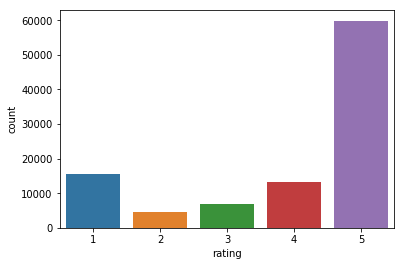

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=dt, x='rating')

#plt.hist(x=dt["rating"], align='mid', label='Rating')
# NAHUEL: no sé por qué me queda el gráfico así (no bien alineado, no se que estaré haciendo mal pero siempre me pasa)
#plt.title("Proporción de cada puntaje")
#plt.show()

Podemos interpretar este hecho como que la persona promedio tiende a ser más **generosa** al dar ratings a productos, y esto nos conduce a pensar que un 3 no representa un cliente demasiado satisfecho. Es por esto que a estos valores NaN le asignamos un valor de '0' (review negativa) en la columna 'target'.

Una forma menos subjetiva de curar los datos faltantes de target podría consistir en hacer un análisis de lenguaje natural sobre los títulos de las reseñas e inferir mediante esto el puntaje de target. Esta técnica excede el alcance de este práctico por lo cual proseguimos con el método mencionado anteriormente.

In [44]:

dt[dt['rating']==3] = dt[dt['rating']==3].fillna(0)
sub_dt = dt[['rating', 'target']]
dt

,rating,title,review,target
0,5,.............Am I in Midgard anymore ?,I was so disappointed to find she has not writ...,1.0
1,1,Zip wax new formula is just horrible.,I've been using zip wax for many years. It was...,0.0
2,5,Apatow's Depth Triumphs,I am a stand-up fanatic. I enjoy the alternati...,1.0
3,1,Dream of C.,It is to bad such talented illustrations are i...,0.0
4,1,it doesnt suck.,this product doesnt vaccum out the air I was d...,0.0
5,2,"The movie itself was okay,",though it seemed to represent far too little o...,0.0
6,5,Surprising...,For a multi-author story this is a surprisingl...,1.0
7,2,works good but the batteries were corroded,The tape measure and the levels themselves wor...,0.0
8,5,Works as advertised,A few hundred miles now and no issues. It took...,1.0
9,5,seeds of singing,i also loaned my copy out and never got it bac...,1.0


Podemos observar en la tabla anterior que los valores de **target** correspondientes a los ratings de valor 3 han sido asignados con el valor 0.0 como una reseña negativa.

In [ ]:
A continuación analicemos los datos de la columna rating para deducir si distribución de probabilidad:

Text(0, 0.5, 'Target')

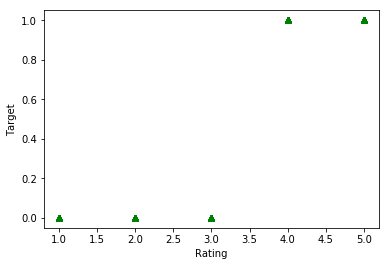

In [37]:
x_rates = dt.iloc[:,0]
y_target = dt.iloc[:,3]
plt.plot(x_rates, y_target, 'g^')
plt.xlabel("Rating"); plt.ylabel("Target")

In [41]:
x_rates.describe()

count    100000.000000
mean          3.975310
std           1.496717
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Se observa que la media de los ratings es de **3.98** con lo cual confirmamos que las reviews tienen una tendencia positiva.

In [42]:
y_target.describe()

count    100000.000000
mean          0.731850
std           0.442998
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

La distribución del target más cercana al valor 1, que podemos inferir por la media de **0.73**, coincide con la tendencia positiva de los ratings.

Notemos que si hubiéramos curado la columna de target, considerando a las reviews con valor 3 como positivas asignándoles valor 1.0, la media sería superior a la anterior.
Veamos a continuación este escenario:

In [52]:
dt2 = pd.read_csv('../dataset/data_review.csv')
dt2[dt2['rating']==3] = dt2[dt2['rating']==3].fillna(1)
dt2.iloc[:,3].describe()

count    100000.000000
mean          0.799600
std           0.400302
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64